In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
file_names = [
    'CL=F.csv',
    'UUP.csv',
    'US_GDP_Monthly.csv',
    'us-crude-oil-production-historical-chart.csv',
    'tweet_sentiment_df.csv']

In [9]:
file_path = "../Data/"

In [10]:
cols = ['date', 'close', 'vader compound', 
        'usalorsgpnostsam',
        'world petroleum consumption', 
        'u.s. petroleum consumption',
        'value']

In [28]:
data = pd.DataFrame()

In [29]:
dfs = []
for i in range(len(file_names)):
    file_name = file_path + file_names[i]
    #print(file_name)
    df = pd.read_csv(file_name,
                    parse_dates = True,
                    infer_datetime_format = True)

    df.columns = df.columns.str.lower()

    n = []
    for c in cols:
        if df.columns.str.contains(c).any():
            n.append(df.columns.get_loc(c))
    df = df.iloc[:,n]
    df = df.replace('NaN', np.nan)
    df.dropna()

    #df.dropna()
    try:
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
    except:
        print(df)
    df = df.set_index('date')

    df.sort_index(inplace = True)
    dfs.append(df)
    if i == 0:
        data = df.copy()
    else:
        data.join(df, how='outer', rsuffix=str(i))

In [30]:
dfs

[            close
 date             
 2000-08-23  32.05
 2000-08-24  31.63
 2000-08-25  32.05
 2000-08-28  32.87
 2000-08-29  32.72
 ...           ...
 2020-09-18  41.11
 2020-09-21  39.31
 2020-09-22  39.60
 2020-09-23  39.93
 2020-09-24  40.31
 
 [5045 rows x 1 columns],
             close
 date             
 2007-03-01  23.84
 2007-03-02  23.83
 2007-03-05  23.98
 2007-03-06  23.96
 2007-03-07  23.86
 ...           ...
 2020-09-18  25.11
 2020-09-21  25.29
 2020-09-22  25.38
 2020-09-23  25.52
 2020-09-24  25.48
 
 [3418 rows x 1 columns],
             usalorsgpnostsam
 date                        
 1960-01-01        100.991749
 1960-02-01        101.002084
 1960-03-01        100.925914
 1960-04-01        100.765569
 1960-05-01        100.540045
 ...                      ...
 2020-01-01         99.951155
 2020-02-01         99.970682
 2020-03-01         95.038084
 2020-04-01         91.904561
 2020-05-01         90.264283
 
 [725 rows x 1 columns],
             value
 date         

In [31]:
data = pd.concat(dfs[:-1], join='outer', axis=1)

In [32]:
data.tail(100)

,close,close,usalorsgpnostsam,value
date,,,,
2020-05-27,32.81,26.78,NaN,NaN
2020-05-28,33.71,26.64,NaN,NaN
2020-05-29,35.49,26.60,NaN,NaN
2020-05-31,35.30,NaN,NaN,NaN
2020-06-01,35.44,26.45,NaN,11000.0
...,...,...,...,...
2020-09-18,41.11,25.11,NaN,NaN
2020-09-21,39.31,25.29,NaN,NaN
2020-09-22,39.60,25.38,NaN,NaN


In [33]:
daily_average = dfs[4].resample('D').mean()

In [34]:
data

,close,close,usalorsgpnostsam,value
date,,,,
1960-01-01,NaN,NaN,100.991749,NaN
1960-02-01,NaN,NaN,101.002084,NaN
1960-03-01,NaN,NaN,100.925914,NaN
1960-04-01,NaN,NaN,100.765569,NaN
1960-05-01,NaN,NaN,100.540045,NaN
...,...,...,...,...
2020-09-18,41.11,25.11,NaN,NaN
2020-09-21,39.31,25.29,NaN,NaN
2020-09-22,39.60,25.38,NaN,NaN


In [35]:
data = data.join(daily_average, how='outer')

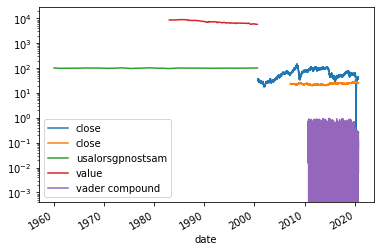

In [36]:
data.plot(logy=True)

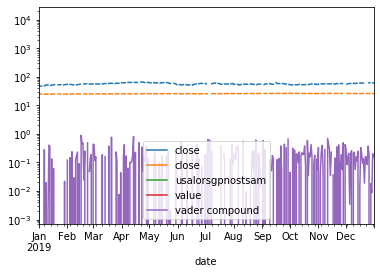

In [39]:
data['2019'].plot(logy=True)

In [38]:
data

,close,close,usalorsgpnostsam,value,vader compound
date,,,,,
1960-01-01,NaN,NaN,100.991749,NaN,NaN
1960-02-01,NaN,NaN,101.002084,NaN,NaN
1960-03-01,NaN,NaN,100.925914,NaN,NaN
1960-04-01,NaN,NaN,100.765569,NaN,NaN
1960-05-01,NaN,NaN,100.540045,NaN,NaN
...,...,...,...,...,...
2020-09-23,39.93,25.52,NaN,NaN,0.005812
2020-09-24,40.31,25.48,NaN,NaN,0.138539
2020-09-25,NaN,NaN,NaN,NaN,0.163099


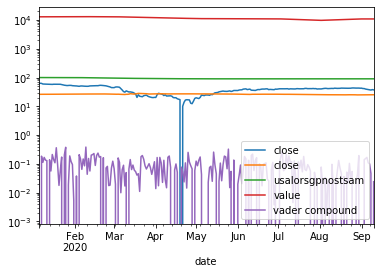

In [40]:
data.interpolate(method ='linear')['2020-1-5':'2020-9-10'].plot(logy=True)

In [41]:
df_all = data.interpolate(method ='linear')

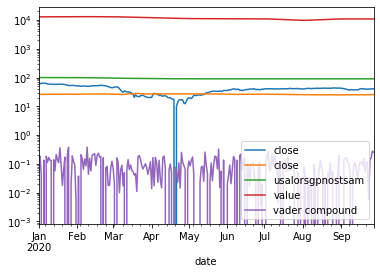

In [43]:
df_all['2020'].plot(logy=True)

In [44]:
df_all.columns

Index(['close', 'close', 'usalorsgpnostsam', 'value', 'vader compound'], dtype='object')

In [45]:
df_all.columns = ['price', 'uup', 'gdp', 'prod', 'vader' ]

In [47]:
df_all = df_all['2019':'2020']

In [48]:
df_all

,price,uup,gdp,prod,vader
date,,,,,
2019-01-01,45.975000,25.045000,100.075204,11900.000000,0.717625
2019-01-02,46.540000,25.140000,100.074436,11906.451613,-0.285450
2019-01-03,47.090000,25.000000,100.073667,11912.903226,-0.215950
2019-01-04,47.960000,24.960000,100.072898,11919.354839,-0.035650
2019-01-05,48.146667,24.923333,100.072129,11925.806452,-0.425675
...,...,...,...,...,...
2020-09-23,39.930000,25.520000,90.264283,10900.000000,0.005812
2020-09-24,40.310000,25.480000,90.264283,10900.000000,0.138539
2020-09-25,40.310000,25.480000,90.264283,10900.000000,0.163099


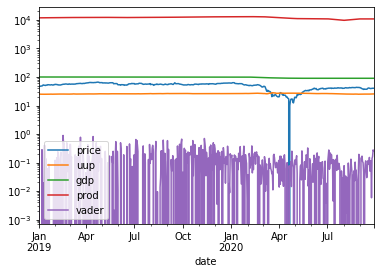

In [49]:
df_all.plot(logy=True)

In [50]:
df_all

,price,uup,gdp,prod,vader
date,,,,,
2019-01-01,45.975000,25.045000,100.075204,11900.000000,0.717625
2019-01-02,46.540000,25.140000,100.074436,11906.451613,-0.285450
2019-01-03,47.090000,25.000000,100.073667,11912.903226,-0.215950
2019-01-04,47.960000,24.960000,100.072898,11919.354839,-0.035650
2019-01-05,48.146667,24.923333,100.072129,11925.806452,-0.425675
...,...,...,...,...,...
2020-09-23,39.930000,25.520000,90.264283,10900.000000,0.005812
2020-09-24,40.310000,25.480000,90.264283,10900.000000,0.138539
2020-09-25,40.310000,25.480000,90.264283,10900.000000,0.163099


In [51]:
df_csv = df_all.copy()

In [52]:
df_csv.reset_index()

,date,price,uup,gdp,prod,vader
0,2019-01-01,45.975000,25.045000,100.075204,11900.000000,0.717625
1,2019-01-02,46.540000,25.140000,100.074436,11906.451613,-0.285450
2,2019-01-03,47.090000,25.000000,100.073667,11912.903226,-0.215950
3,2019-01-04,47.960000,24.960000,100.072898,11919.354839,-0.035650
4,2019-01-05,48.146667,24.923333,100.072129,11925.806452,-0.425675
...,...,...,...,...,...,...
631,2020-09-23,39.930000,25.520000,90.264283,10900.000000,0.005812
632,2020-09-24,40.310000,25.480000,90.264283,10900.000000,0.138539
633,2020-09-25,40.310000,25.480000,90.264283,10900.000000,0.163099
634,2020-09-26,40.310000,25.480000,90.264283,10900.000000,0.277375


In [55]:
from pathlib import Path
file_path = Path("df_all.csv")
df_csv.to_csv(file_path)